In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import csv

## Data Files upload
- Grocery stores csv and shp file
- Entropy Index csv from Vianny 

In [3]:
#Affordldable Housing Locations 
url='https://raw.githubusercontent.com/kathiavf16/DS4A-Team-10/main/data/affordable_housing.csv'
df=pd.read_csv(url)

In [5]:
#Grocery Store Locations 
url='https://raw.githubusercontent.com/kathiavf16/DS4A-Team-10/main/data/grocery_store_locations.csv'
df_stores=pd.read_csv(url)

In [36]:
#Entropy Index csv
Entro=pd.read_csv('https://raw.githubusercontent.com/kathiavf16/DS4A-Team-10/main/data/dc_dat_with_entropy.csv').rename(columns={'Unnamed: 0':'GEOID'})

#made into geodataframe if needed
Entro_geo=gpd.GeoDataFrame(Entro)

In [33]:
# df_stores.head(5)
# df_stores.columns

In [7]:
#Check columns to see if there is x, y coordinates
df_stores.columns

Index(['the_geom', 'cartodb_id', 'x', 'y', 'objectid', 'storename', 'address',
       'phone', 'present90', 'present95', 'present00', 'present05',
       'present08', 'notes', 'present09', 'present10', 'present11',
       'present12', 'present13', 'present14', 'present15', 'present16',
       'present17', 'x_coord', 'y_coord', 'ward', 'address_id', 'ssl',
       'zipcode', 'present18', 'gis_id'],
      dtype='object')

## CSV --> plotable point example using Grocery Stores CSV

In [34]:
#convert xy coordinates to a point by adding a new column named geometry
geometry= [Point(xy) for xy in zip(df_stores['x'], df_stores['y'])]
geometry[:3]

In [9]:
#convert to a geodata frame 
df_stores_geo= gpd.GeoDataFrame(df_stores, geometry=geometry)

In [35]:
#df_stores_geo.head(5)

## SHP file upload

In [11]:
Street_Map= gpd.read_file('Roadway_SubBlock.shp')
Census_tracts=gpd.read_file('Census_Tracts_in_2010.shp')
stores=gpd.read_file('Grocery_Store_Locations.shp')


In [12]:
#check that type is an object
Census_tracts.type

0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
174    Polygon
175    Polygon
176    Polygon
177    Polygon
178    Polygon
Length: 179, dtype: object

## Joins -- Spatial and Attribute 

- Spatial join between food store locations (shp) and census tracts (shp) to see which stores fall in which census tract
https://geopandas.org/reference/geopandas.sjoin.html


- Attribute join. This is joining a dataframe with a geodataframe aka table with shp file

In [14]:
#spatial join 
FoodStore_within_Census_tracts= gpd.sjoin(stores,Census_tracts, op='within', how='inner')

In [ ]:
#check if all columns were added
FoodStore_within_Census_tracts.columns
pd.set_option('display.max_columns', None)

In [38]:
#attribute join using concat
#Joining the entropy index to each census tract 
Entro_CensusTracts=pd.concat([Entro,Census_tracts], join='inner', axis=1)

#making it into a geodataframe to be mapped
Entro_CensusTracts_geo=gpd.GeoDataFrame(Entro_CensusTracts)

## File Manipulation for mapping

In [77]:
# in the USDA file 1=exist 0= no 
#the variable we choose here was access to car

one= test_1[test_1['LATractsVehicle_20'] == 1]
zero= test_1[test_1['LATractsVehicle_20'] == 0]

## Exporting Files

In [19]:
#dataframe to a csv
FoodStore_within_Census_tracts.to_csv('data/FoodStores_CensusTracts.csv', index=False)

In [21]:
#to shp file
FoodStore_within_Census_tracts.to_file('data/FoodStore_within_Census_tracts.shp')

In [39]:
# to shp file and csv 
Entro_CensusTracts_geo.to_file('data/Entro_CensusTracts.shp')
Entro_CensusTracts.to_csv('data/Entro_CensusTracts.csv', index=False)

# Maps

<AxesSubplot:>

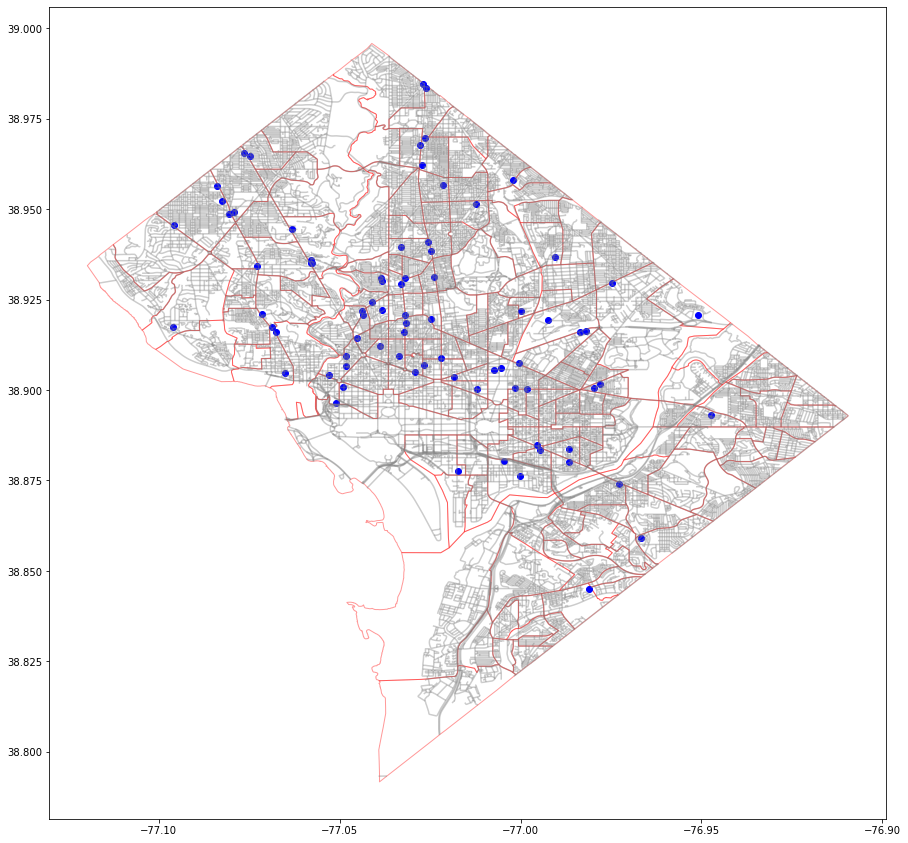

In [13]:
#Food Stores in each census tract 
fig,ax=plt.subplots(figsize=(15,15))
Street_Map.plot(ax=ax, alpha=0.4, color='grey')
Census_tracts.plot(ax=ax, alpha=0.4, edgecolor='red', facecolor='None')
df_stores_geo.plot(ax=ax, color='blue', marker='o')

<AxesSubplot:>

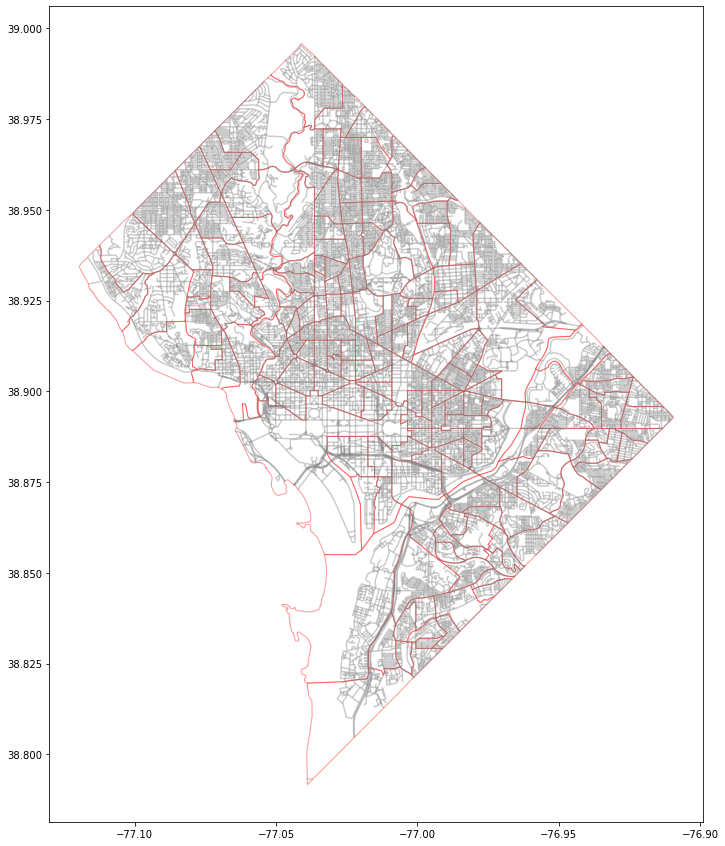

In [40]:
#Testing to see if the census entro file was working
fig,ax=plt.subplots(figsize=(15,15))
Street_Map.plot(ax=ax, alpha=0.4, color='grey')
Entro_CensusTracts_geo.plot(ax=ax, alpha=0.4, edgecolor='red', facecolor='None')


<AxesSubplot:>

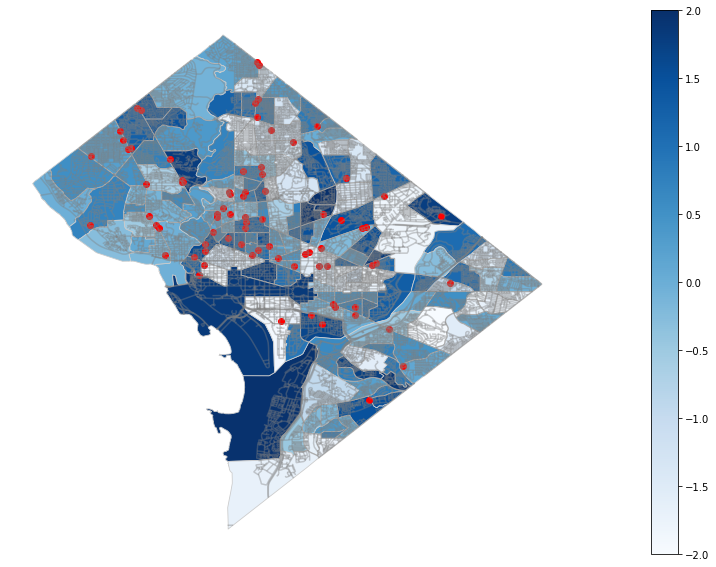

In [42]:
#Map example

variable= 'entropy_index'
vmin, vmax = -2, 2
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm)
Entro_CensusTracts_geo.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
Street_Map.plot(ax=ax, alpha=0.4, color='grey')
df_stores_geo.plot(ax=ax, color='red', marker='o')

